In [1]:
#importing the important data visualization and manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imorting the machine learning libraries and the other preprocessing libraries

#encoding of the categorical labels
from sklearn.preprocessing import LabelEncoder

#building t
from sklearn.linear_model import LogisticRegression

#splitting of the data into training and testing
from sklearn.model_selection import train_test_split

#libraries for different metrics
from sklearn import metrics


#resampling libraries
from sklearn.utils import resample

In [3]:
#importing all the model selection techniques
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

#Removing all unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing the dataset
dataset=pd.read_csv("toy_dataset.csv")
dataset.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
#seeing the binary class data to see if the data is balanced or imbalanced
dataset.Illness.value_counts()

No     137861
Yes     12139
Name: Illness, dtype: int64

In [6]:
#There are null values in the dataset
dataset.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

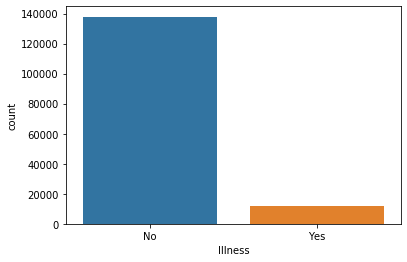

In [7]:
sns.countplot(dataset["Illness"])
#Some data Visualization of number of class_labels of one type

In [8]:
dataset[dataset["Illness"]=="No"].head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [9]:
dataset.count()

Number     150000
City       150000
Gender     150000
Age        150000
Income     150000
Illness    150000
dtype: int64

In [10]:
dataset.shape

(150000, 6)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
Number     150000 non-null int64
City       150000 non-null object
Gender     150000 non-null object
Age        150000 non-null int64
Income     150000 non-null float64
Illness    150000 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [12]:
#encoding categorical values 
dataset.loc[dataset['Gender']=='Male','Gender']   = 1
dataset.loc[dataset['Gender']=='Female','Gender'] = 0


#Important step to make the city row as a different column as it increases the data and help in making the model
#more better in an assumption to say that city is also an important parameter which predicts whether the person is 
#ill or not
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(dataset['City'])


#making of the new dataframe
new_df = pd.DataFrame(lb_results, columns=lb.classes_)

#then concatenating with the old dataset
dataset = pd.concat([dataset, new_df], axis = 1)

In [13]:
#Now seeing the new datasset
dataset.head()

,Number,City,Gender,Age,Income,Illness,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,1,Dallas,1,41,40367.0,No,0,0,1,0,0,0,0,0
1,2,Dallas,1,54,45084.0,No,0,0,1,0,0,0,0,0
2,3,Dallas,1,42,52483.0,No,0,0,1,0,0,0,0,0
3,4,Dallas,1,40,40941.0,No,0,0,1,0,0,0,0,0
4,5,Dallas,1,46,50289.0,No,0,0,1,0,0,0,0,0


In [14]:
#drop the unnecessary variables 
X = dataset.drop(['Illness','Number', 'City'], axis=1)
y = dataset.Illness

In [15]:
X.head()

,Gender,Age,Income,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,1,41,40367.0,0,0,1,0,0,0,0,0
1,1,54,45084.0,0,0,1,0,0,0,0,0
2,1,42,52483.0,0,0,1,0,0,0,0,0
3,1,40,40941.0,0,0,1,0,0,0,0,0
4,1,46,50289.0,0,0,1,0,0,0,0,0


In [16]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Illness, dtype: object

In [17]:
#Label Encoding of the data
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y), name='Illness')

In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: Illness, Length: 150000, dtype: int64

In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Illness, dtype: int64

In [20]:
#Splitting of the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [21]:
X = pd.concat([X_train, y_train], axis=1)

In [22]:
'''Now we are seperating the data on the basis of majority and minority classes to apply oversampling'''

'Now we are seperating the data on the basis of majority and minority classes to apply oversampling'

In [23]:
#Separating out the ill and not ill candidate
not_ill = X[X.Illness== 0]
ill = X[X.Illness== 1]

In [24]:
not_ill.shape

(103367, 12)

In [25]:
ill.shape

(9133, 12)

In [26]:
#when you have one kind of sample very less than another class so you have to upsample
#This is technique that we have to apply when out data set is biased towards one class 
ill_upsampled = resample(ill,
                         replace=True, # sample with replacement
                         n_samples=len(not_ill), # match number in majority class
                         random_state=100) # reproducible results

In [27]:
#Now both clas have equal samples
#concatenating the upsampled data
upsampled = pd.concat([not_ill, ill_upsampled])
upsampled.Illness.value_counts()

1    103367
0    103367
Name: Illness, dtype: int64

In [28]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 

In [29]:
#Training And Testing Model
#using the Logistic regression Model
y_train = upsampled.Illness
X_train = upsampled.drop('Illness', axis=1)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [30]:
#Training Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.5001

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.43      0.46    103367
           1       0.50      0.57      0.53    103367

    accuracy                           0.50    206734
   macro avg       0.50      0.50      0.50    206734
weighted avg       0.50      0.50      0.50    206734


Confusion Matrix: 
 [[44757 58610]
 [44738 58629]]

Average Accuracy: 	 0.4999
Accuracy SD: 		 0.0032


In [31]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.4369

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.43      0.58     34494
           1       0.08      0.56      0.14      3006

    accuracy                           0.44     37500
   macro avg       0.50      0.49      0.36     37500
weighted avg       0.85      0.44      0.55     37500


Confusion Matrix: 
 [[14699 19795]
 [ 1321  1685]]



In [32]:
#Very Bad Result
#Results are not that much good

In [33]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.simplefilter("ignore")

In [34]:
#upsampling uising SMOTE librarry
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [35]:
dataset.head()

,Number,City,Gender,Age,Income,Illness,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,1,Dallas,1,41,40367.0,No,0,0,1,0,0,0,0,0
1,2,Dallas,1,54,45084.0,No,0,0,1,0,0,0,0,0
2,3,Dallas,1,42,52483.0,No,0,0,1,0,0,0,0,0
3,4,Dallas,1,40,40941.0,No,0,0,1,0,0,0,0,0
4,5,Dallas,1,46,50289.0,No,0,0,1,0,0,0,0,0


In [36]:
# setting up testing and training sets
X = dataset.drop(['Illness','Number', 'City'], axis=1)
y = dataset.Illness
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y), name='Illness')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [37]:
#Oversampling using Smote
#Simple just fit the data using SMOTE object
#it returns the upsampled data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [38]:
#Visualizing Balanced Training data after Smote Sampling

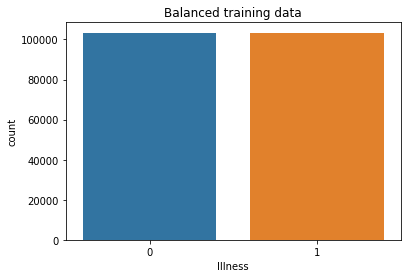

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y_train)
plt.title('Balanced training data')
plt.show()

In [40]:
#using the ensemble Method just like Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
#Printin the various scores and Metrics
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    103367
           1       1.00      1.00      1.00    103367

    accuracy                           1.00    206734
   macro avg       1.00      1.00      1.00    206734
weighted avg       1.00      1.00      1.00    206734


Confusion Matrix: 
 [[103327     40]
 [    36 103331]]

Average Accuracy: 	 0.8231
Accuracy SD: 		 0.0592


In [42]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7610

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.81      0.86     34494
           1       0.07      0.17      0.10      3006

    accuracy                           0.76     37500
   macro avg       0.50      0.49      0.48     37500
weighted avg       0.85      0.76      0.80     37500


Confusion Matrix: 
 [[28013  6481]
 [ 2481   525]]



In [43]:
'''Still we are not getting desired as for class 1 there is only 8% precision 
and recall is too less,so we are using GridSearch so that we can get best parameter'''

'Still we are not getting desired as for class 1 there is only 8% precision \nand recall is too less,so we are using GridSearch so that we can get best parameter'

In [44]:
#Now paramter tuning we do using the GridSearchCv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
rf_clf = RandomForestClassifier(random_state=42)
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 5],
               "min_samples_leaf": [1, 3, 5],
               "bootstrap": [True, False],
               "criterion": ['entropy']}

In [46]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=3,
                           verbose=1, scoring='accuracy')

In [47]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 35.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [48]:
grid_search.best_score_

0.8191591066685472

In [49]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)
#seeing the accuracy is now at another level

Train Result:

accuracy score: 0.9671

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    103367
           1       0.98      0.96      0.97    103367

    accuracy                           0.97    206734
   macro avg       0.97      0.97      0.97    206734
weighted avg       0.97      0.97      0.97    206734


Confusion Matrix: 
 [[101166   2201]
 [  4595  98772]]

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min


In [ ]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)